# Gravitational radiation from circular equatorial orbits

This Jupyter notebook requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw). To install it, simply run `sage -pip install kerrgeodesic_gw` 

In [1]:
from kerrgeodesic_gw import (KerrBH, h_plus_particle, h_cross_particle,
                             plot_h_particle)

Let us consider the gravitational wave emission from a particle of mass $\mu$ on the prograde ISCO of a Kerr black hole with $a = 0.90 M$:

In [2]:
a = 0.90
r0 = KerrBH(a).isco_radius()
r0

2.32088304176189

## Waveforms

The function `h_plus_particle` gives the rescaled gravitational wave in the $+$ mode, $(r/\mu)\, h_+$, at the retarded time $u = t - r_*$:

In [3]:
theta = pi/4
phi = 0
u = 0
h_plus_particle(a, r0, u, theta, phi)

0.5582496798737479

while the function `h_cross_particle` gives $(r/\mu)\, h_\times$:

In [4]:
h_cross_particle(a, r0, u, theta, phi)

-0.05710956283550757

Plot of the waveform on twice the orbital period:

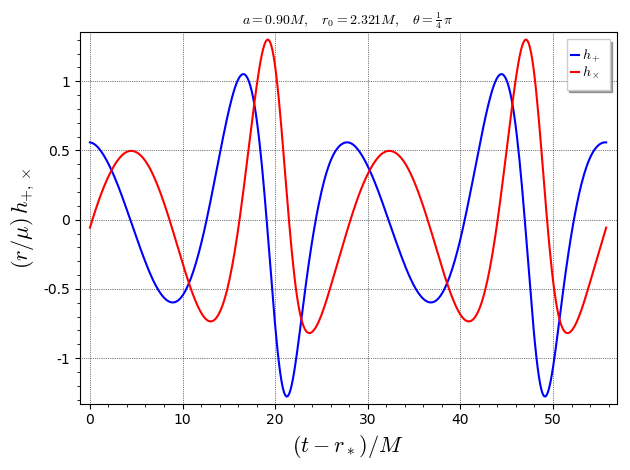

In [5]:
umin = 0
umax = 2/KerrBH(a).orbital_frequency(r0)
plot_h_particle(a, r0, theta, phi, umin, umax, plot_points=400)

Same thing for $\theta=\frac{\pi}{2}$:

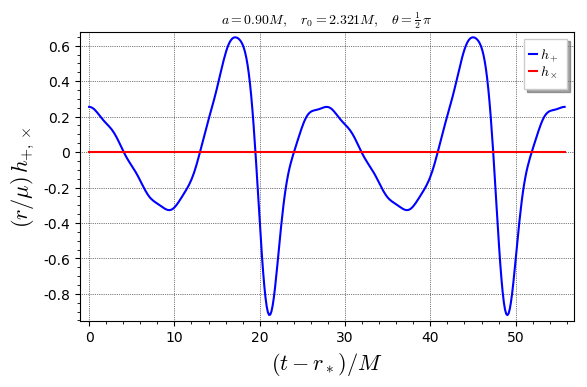

In [6]:
plot_h_particle(a, r0, pi/2, phi, umin, umax, plot_points=400)

## Signal-to-noise ratio in LISA detector for emission from Sgr A*

In [7]:
from kerrgeodesic_gw import (lisa_detector, astro_data, 
                             signal_to_noise_particle) 

The factor $\mu/r$, with $\mu = 1 M_\odot$ and $r$ the distance to Sgr A*:

In [8]:
mu_ov_r = astro_data.solar_mass_m / astro_data.SgrA_distance_m
mu_ov_r

5.893382851243562e-18

The mass of Sgr A* in seconds:

In [9]:
BH_time_scale = astro_data.SgrA_mass_s
BH_time_scale

20.19455944613262

The effective power spectral density of LISA noise:

In [10]:
psd = lisa_detector.power_spectral_density

The signal-to-noise ratio for one day of observations is:

In [11]:
theta = pi/4
t_obs = 24*3600  # 1 day in seconds
signal_to_noise_particle(a, r0, theta, psd, t_obs,
                         BH_time_scale, scale=mu_ov_r)

103717.0130951534

Plot of the SNR as a function of the orbital radius:

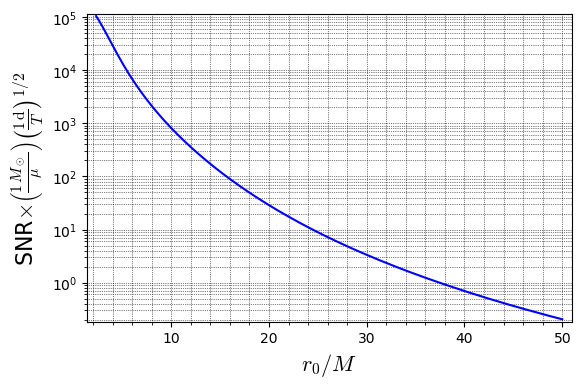

In [12]:
rmin = KerrBH(a).isco_radius()
rmax = 50
fsnr = lambda r0: signal_to_noise_particle(a, r0, theta, psd, t_obs, 
                                           BH_time_scale, scale=mu_ov_r)
graph = plot(fsnr, (rmin, rmax), plot_points=50,  
             thickness=1.5, scale='semilogy', 
             axes_labels=[r"$r_0/M$", 
                          r"SNR$\times \left(\frac{1\, M_\odot}{\mu}\right) \left(\frac{1\, {\rm d}}{T}\right) ^{1/2}$"],
             gridlines='minor', frame=True, axes=False)
graph